# Problem Set 1: Visualization

Gino Rospigliosi

ENME440

Section: 0101

No collaboration

# Question 1:


In [430]:
import numpy as np
import pandas as pd
data_url = 'https://raw.githubusercontent.com/WhiteHouse/budgetdata/2016/data/outlays.csv'
data = pd.io.parsers.read_csv(data_url,
                             usecols = [0,1,3,5,8,9,67])
# convert the 2016 data to a number
data['2016'] = data['2016'].str.replace(',', '')
data['2016']=data['2016'].apply(pd.to_numeric)
# The 2016 data is actually in thousands of dollars, so correct for this
data['2016']=data['2016']*1000

In [431]:
# 2016 Federal Expeditures were ~$3.99 Trillion, so this should match that
import locale
locale.setlocale( locale.LC_ALL, '' )
total_budget = sum(data['2016'])
print('Total Expenditures: ',
      locale.currency( total_budget, grouping=True ))

Total Expenditures:  $3,999,467,000,000.00


In [432]:
# We only want data points that were discretionary and non-zero
non_zero = data['2016']>0
discretionary = data['BEA Category']=='Discretionary'

In [433]:
relevant_data = data[discretionary & non_zero]

In [434]:
relevant_data

,Agency Code,Agency Name,Bureau Name,Account Name,Subfunction Title,BEA Category,2016
8,1,Legislative Branch,Senate,"Salaries, Officers and Employees",Legislative functions,Discretionary,186000000
10,1,Legislative Branch,Senate,Miscellaneous Items,Legislative functions,Discretionary,21000000
11,1,Legislative Branch,Senate,Secretary of the Senate,Legislative functions,Discretionary,8000000
12,1,Legislative Branch,Senate,Sergeant at Arms and Doorkeeper of the Senate,Legislative functions,Discretionary,134000000
13,1,Legislative Branch,Senate,Inquiries and Investigations,Legislative functions,Discretionary,134000000
...,...,...,...,...,...,...,...
4791,537,Federal Housing Finance Agency,Federal Housing Finance Agency,Office of Inspector General,Mortgage credit,Discretionary,42000000
4794,539,Recovery Accountability and Transparency Board,Recovery Act Accountability and Transparency B...,Salaries and Expenses,Other general government,Discretionary,1000000
4796,573,Northern Border Regional Commission,Northern Border Regional Commission,Northern Border Regional Commission,Area and regional development,Discretionary,5000000
4797,575,National Railroad Passenger Corporation Office...,National Railroad Passenger Corporation Office...,Salaries and Expenses,Ground transportation,Discretionary,25000000


In [435]:
relevant_data[['Account Name','2016']]

,Account Name,2016
8,"Salaries, Officers and Employees",186000000
10,Miscellaneous Items,21000000
11,Secretary of the Senate,8000000
12,Sergeant at Arms and Doorkeeper of the Senate,134000000
13,Inquiries and Investigations,134000000
...,...,...
4791,Office of Inspector General,42000000
4794,Salaries and Expenses,1000000
4796,Northern Border Regional Commission,5000000
4797,Salaries and Expenses,25000000


Of all of the different agencies, which contributed the largest discretionary expenditures to the overall 2016 federal budget?"

In [436]:
column = relevant_data['2016']
idx = column.idxmax()
data.iloc[idx]

Agency Code                                                 7
Agency Name          Department of Defense--Military Programs
Bureau Name                         Operation and Maintenance
Account Name                  Operation and Maintenance, Army
Subfunction Title              Department of Defense-Military
BEA Category                                    Discretionary
2016                                              53257000000
Name: 1020, dtype: object

contributed the largest discretionary expenditures to the overall 2016 federal budget

In [437]:
grouped_data = relevant_data.groupby(["Agency Name"]).sum()
grouped_data

,Agency Code,2016
Agency Name,,
Access Board,310,7000000
Administrative Conference of the United States,302,3000000
Advisory Council on Historic Preservation,306,6000000
Appalachian Regional Commission,618,85000000
Broadcasting Board of Governors,1028,743000000
...,...,...
State Justice Institute,453,5000000
United States Court of Appeals for Veterans Claims,345,35000000
United States Holocaust Memorial Museum,456,54000000


In [438]:
sorted_data = grouped_data.sort_values(by=['2016'], ascending=False)
sorted_data


,Agency Code,2016
Agency Name,,
Department of Defense--Military Programs,749,578019000000
Department of Health and Human Services,369,84969000000
Department of Veterans Affairs,551,71528000000
Department of Education,612,70132000000
Department of Housing and Urban Development,1075,53101000000
...,...,...
National Credit Union Administration,415,2000000
Other Commissions and Boards,505,1000000
Recovery Accountability and Transparency Board,539,1000000


Text(0.5, 1.0, '2016 Budget- Discretionary Expenditures (Top 5)')

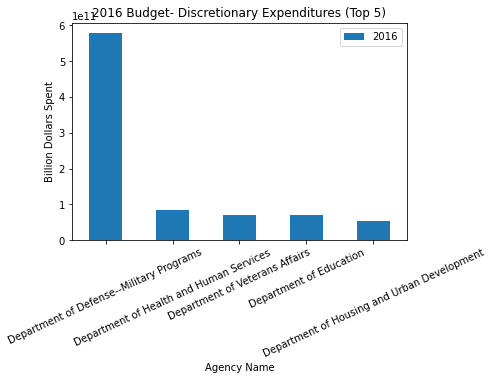

In [439]:
#array = pd.DataFrame({'Agency Name', '2016'}).to_numpy()
#print(array)
final_data = sorted_data.head(n=5)
final_data.plot.bar( y='2016', rot=25)
plt.ylabel('Billion Dollars Spent')
plt.title('2016 Budget- Discretionary Expenditures')
plt.ylabel('Billion Dollars Spent')
plt.title('2016 Budget- Discretionary Expenditures (Top 5)')

#other non-functional code
#x= sorted_data['Agency Name']
#y= sorted_data['2016']
#y= y.values

#import matplotlib.pyplot as plt
#fig = plt.figure(figsize=(7,5))
#plt.bar(x,y)
#plt.xlabel('Agency')
#plt.show()
#grouped_data.plot(x ='Agency Name', y='2016', kind = 'bar')


#Could not visulize data in Bar chart or pie chart form for graphic. 
#However, above table and below bar chart provide greatest data-to-ink ratio

# Question 2:

In [440]:
import numpy as np
from sklearn.datasets.california_housing import fetch_california_housing
cal_housing = fetch_california_housing('.')

C:\Users\GRosp\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass data_home=. as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [441]:
print(cal_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [442]:
X = cal_housing.data
avg_price = cal_housing.target
feature_names = cal_housing.feature_names
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [443]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [444]:
import pandas as pd
df=pd.DataFrame(np.hstack([X,avg_price[:,np.newaxis]]),columns=np.hstack([feature_names,'price']))
#Example of the first few rows of data (using the "head" command)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [445]:
# Below is how you might select only some columns from a dataframe.
# This is just an illustrative example; you could select other columns
subdf = df[['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','price']]
subdf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


(array([2247., 7436., 6098., 2990., 1060.,  428.,  178.,   93.,   47.,
          63.]),
 array([ 0.4999 ,  1.94992,  3.39994,  4.84996,  6.29998,  7.75   ,
         9.20002, 10.65004, 12.10006, 13.55008, 15.0001 ]),
 <a list of 10 Patch objects>)

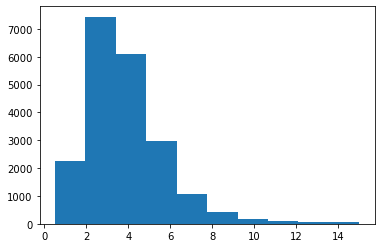

In [446]:
# Matplotlib plotting example
# Below line tells the notebook to plots the images here
# in the notebook, rather than separately as image files.
%matplotlib inline 
import matplotlib.pyplot as plt
plt.hist(df['MedInc'])

In [447]:
# Pandas Example- Uncomment below and run if you want
# Note, this is essentially just a shortcut to matplotlib
#df['MedInc'].plot.hist()

In [448]:
# Seaborn Example - Uncomment below and run if you want
#import seaborn as sns  
# Note, just importing seaborn changes the matplotlib default behavior
#sns.distplot(df['MedInc'])

# Task 1: Visualize the relationship between features and price

Text(0, 0.5, 'Price')

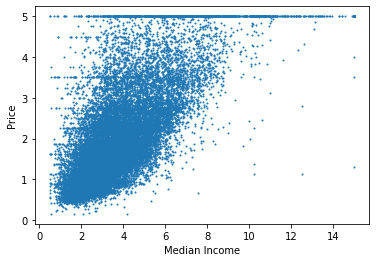

In [449]:
x = df['MedInc']
y = df['price']
x= x.values
y= y.values
import matplotlib.pyplot as plt
plt.scatter(x,y,s=1)
plt.xlabel('Median Income')
plt.ylabel('Price')

Text(0.5, 1.0, 'California Housing')

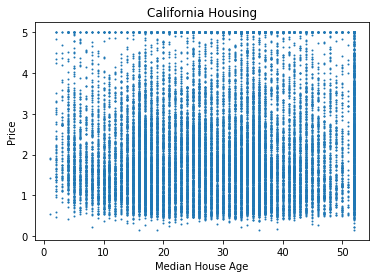

In [450]:
x = df['HouseAge']
y = df['price']
x= x.values
y= y.values
import matplotlib.pyplot as plt
plt.scatter(x,y,s=1)
plt.xlabel('Median House Age')
plt.ylabel('Price')
plt.title('California Housing')

Text(0.5, 1.0, 'California Housing')

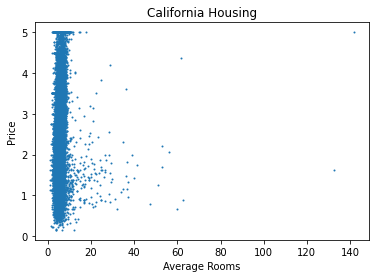

In [451]:
x = df['AveRooms']
y = df['price']
x= x.values
y= y.values
import matplotlib.pyplot as plt
plt.scatter(x,y,s=1)
plt.xlabel('Average Rooms')
plt.ylabel('Price')
plt.title('California Housing')

Text(0.5, 1.0, 'California Housing')

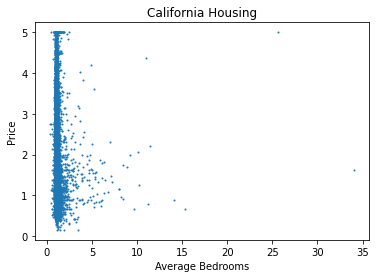

In [452]:
x = df['AveBedrms']
y = df['price']
x= x.values
y= y.values
import matplotlib.pyplot as plt
plt.scatter(x,y,s=1)
plt.xlabel('Average Bedrooms')
plt.ylabel('Price')
plt.title('California Housing')

Text(0.5, 1.0, 'California Housing')

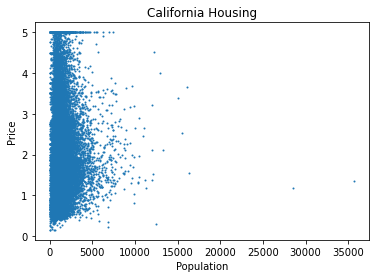

In [453]:
x = df['Population']
y = df['price']
x= x.values
y= y.values
import matplotlib.pyplot as plt
plt.scatter(x,y,s=1)
plt.xlabel('Population')
plt.ylabel('Price')
plt.title('California Housing')

Text(0.5, 1.0, 'California Housing')

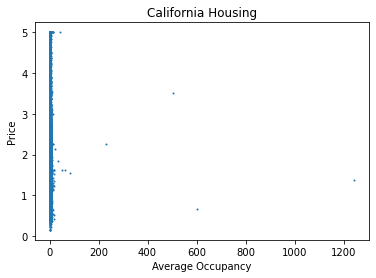

In [454]:
x = df['AveOccup']
y = df['price']
x= x.values
y= y.values
import matplotlib.pyplot as plt
plt.scatter(x,y,s=1)
plt.xlabel('Average Occupancy')
plt.ylabel('Price')
plt.title('California Housing')

Text(0.5, 1.0, 'California Housing')

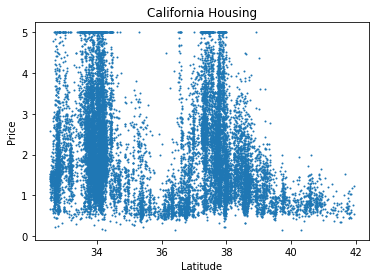

In [455]:
x = df['Latitude']
y = df['price']
x= x.values
y= y.values
import matplotlib.pyplot as plt
plt.scatter(x,y,s=1)
plt.xlabel('Latitude')
plt.ylabel('Price')
plt.title('California Housing')

Text(0.5, 1.0, 'California Housing')

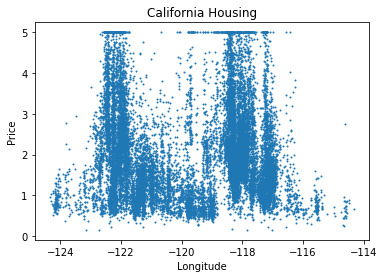

In [456]:
x = df[ 'Longitude']
y = df['price']
x= x.values
y= y.values
import matplotlib.pyplot as plt
plt.scatter(x,y,s=1)
plt.xlabel( 'Longitude')
plt.ylabel('Price')
plt.title('California Housing')

Do any of the features appear linearly correlated with price? 

The features of Median Income, Average Rooms, Average Bedrooms, and Population seem to be linearly corelated with prices.


# Task 2: Visualize the relationships between features

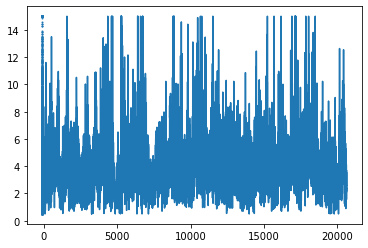

In [457]:
import matplotlib.pyplot as plt
y = df['MedInc']
plt.scatter(x,y,s=1)
plt.plot(y)  
#x-values assumed to be [0, 1, 2, 3]
plt.show() 

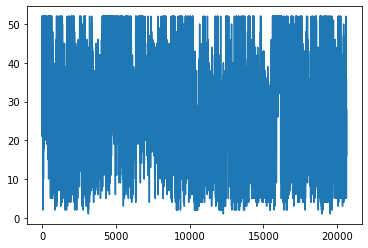

In [458]:
import matplotlib.pyplot as plt
y = df['HouseAge']
plt.plot(y)  
#x-values assumed to be [0, 1, 2, 3]
plt.show() 

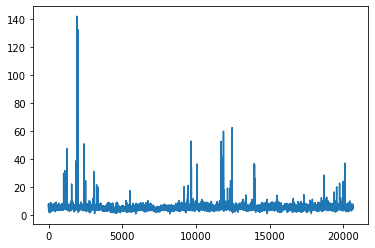

In [459]:
import matplotlib.pyplot as plt
y = df['AveRooms']
plt.plot(y)  
#x-values assumed to be [0, 1, 2, 3]
plt.show() 

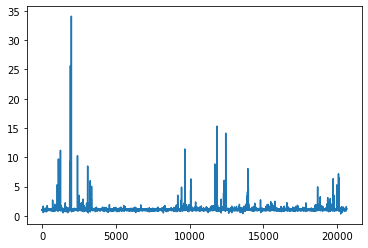

In [460]:
import matplotlib.pyplot as plt
y = df['AveBedrms']
plt.plot(y)  
#x-values assumed to be [0, 1, 2, 3]
plt.show() 

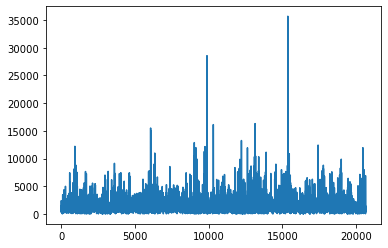

In [461]:
import matplotlib.pyplot as plt
y = df['Population']
plt.plot(y)  
#x-values assumed to be [0, 1, 2, 3]
plt.show() 

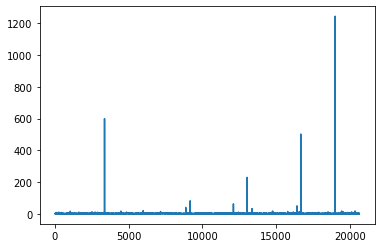

In [462]:
import matplotlib.pyplot as plt
y = df['AveOccup']
plt.plot(y)  
#x-values assumed to be [0, 1, 2, 3]
plt.show() 

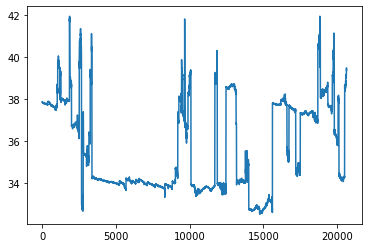

In [463]:
import matplotlib.pyplot as plt
y = df['Latitude']
plt.plot(y)  
#x-values assumed to be [0, 1, 2, 3]
plt.show() 

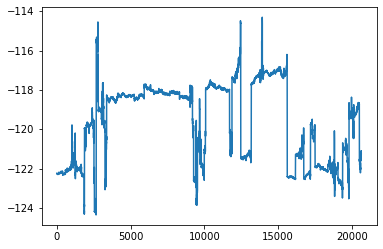

In [464]:
import matplotlib.pyplot as plt
y = df['Longitude']
plt.plot(y)  
#x-values assumed to be [0, 1, 2, 3]
plt.show() 

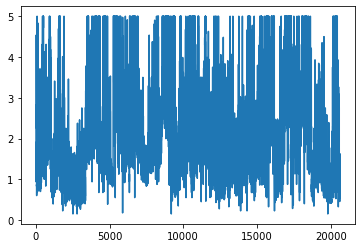

In [465]:
import matplotlib.pyplot as plt
y = df['price']
plt.plot(y)  
#x-values assumed to be [0, 1, 2, 3]
plt.show() 

Question: Are there any anomalies that look strange in the data, and which visualization helped you identify them (hint: there should be)?

1-D visualization helped to identify anomalies. Anomlies are identifed and outliers on upper and lower ranges of data. Less variance means a higher level of bias. Therfore, average occupants, average rooms, and average bedrooms has anomaly of a small range and underrepresented ranges shown by density/frequency.